In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi as dv

In [3]:
df = dv.get_vsi_with_scores()
df

Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/bld_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 14358.69it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/blk_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15611.03it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15651.22it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15879.65it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/gemini-1.5_pro.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 13674.89it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/llava_vid_7b.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 14720.21it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data

Loaded 5130 files. Loading VSI-Bench...


id      dataset    scene_name    question_type  \
0        0  arkitscenes      41069025  object_counting   
1        1  arkitscenes      41069025  object_counting   
2        2  arkitscenes      41069043  object_counting   
3        3  arkitscenes      41125700  object_counting   
4        4  arkitscenes      41125700  object_counting   
...    ...          ...           ...              ...   
5125  5151      scannet  scene0196_00   route_planning   
5126  5152      scannet  scene0378_01   route_planning   
5127  5153  arkitscenes      47331654   route_planning   
5128  5154  arkitscenes      42445026   route_planning   
5129  5155  arkitscenes      42446529   route_planning   

                                               question ground_truth  \
0                   How many table(s) are in this room?            4   
1                   How many chair(s) are in this room?            2   
2                   How many table(s) are in this room?            2   
3                    How many sofa(s) are in this room?            2   
4                   How many table(s) are in this room?            3   
...                                                 ...          ...   
5125  You are a robot beginning at the trash bin nea...            C   
5126  You are a robot beginning at the door and faci...            A   
5127  You are a robot beginning at the heater and fa...            D   
5128  You are a robot beginning at the doorframe and...            C   
5129  You are a robot beginning at the closet and fa...            A   

                                                options  \
0                                                  None   
1                                                  None   
2                                                  None   
3                                                  None   
4                                                  None   
...                                                 ...   
5125  [A. Turn Right, Turn Left, B. Turn Right, Turn...   
5126  [A. Turn Left, Turn Left, Turn Left, B. Turn L...   
5127  [A. Turn Left, Turn Right, B. Turn Back, Turn ...   
5128        [A. Turn Left, B. Turn Back, C. Turn Right]   
5129  [A. Turn Right, Turn Left, Turn Left, B. Turn ...   

      bld_sims_3q_10k_blind  blk_sims_3q_10k_blind  cambrian-s  ...  \
0                       0.0                    0.0         0.1  ...   
1                       0.1                    0.1         1.0  ...   
2                       0.1                    0.1         1.0  ...   
3                       0.1                    0.1         1.0  ...   
4                       0.0                    0.0         0.4  ...   
...                     ...                    ...         ...  ...   
5125                    0.0                    0.0         0.0  ...   
5126                    0.0                    0.0         0.0  ...   
5127                    0.0                    0.0         0.0  ...   
5128                    1.0                    1.0         1.0  ...   
5129                    0.0                    1.0         1.0  ...   

      rgb_sims_3q_25k  rgb_sims_3q_25k_blind  rgb_sims_manV2_5k  \
0                 0.1                    0.0                0.1   
1                 0.1                    0.1                0.1   
2                 1.0                    0.1                1.0   
3                 0.1                    0.1                0.1   
4                 0.4                    0.0                0.4   
...               ...                    ...                ...   
5125              0.0                    0.0                0.0   
5126              0.0                    0.0                0.0   
5127              0.0                    0.0                0.0   
5128              1.0                    1.0                1.0   
5129              1.0                    1.0                1.0   

      rgb_sims_manV2_5k_blind  vsi_train_10k  vsi_train_10k_blind  \
0         

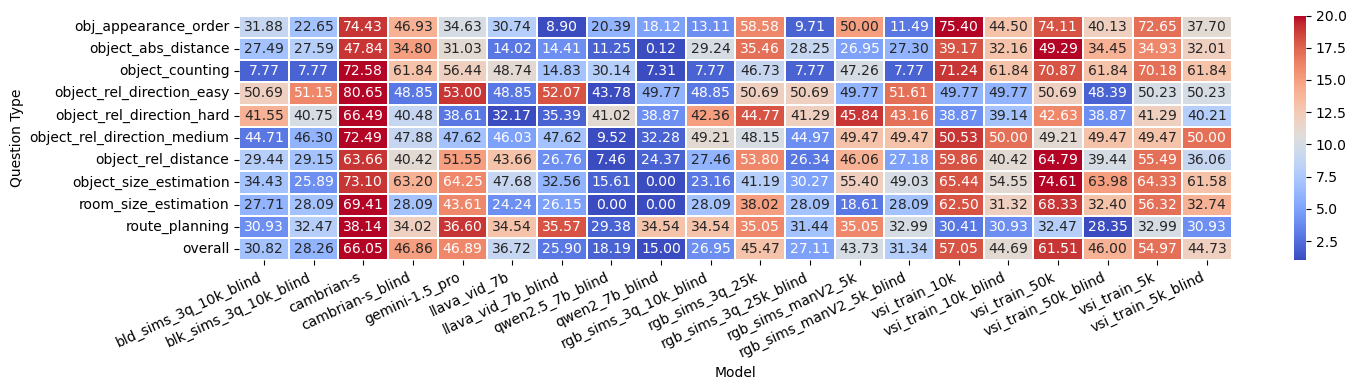

In [4]:
dv.visualize_model_scores(df);

## Relative Direction

In [5]:
qdf = df[df["question_type"].str.startswith("object_rel_direction")].copy()

In [6]:
qdf["question_type"].value_counts()

question_type
object_rel_direction_medium    378
object_rel_direction_hard      373
object_rel_direction_easy      217
Name: count, dtype: int64

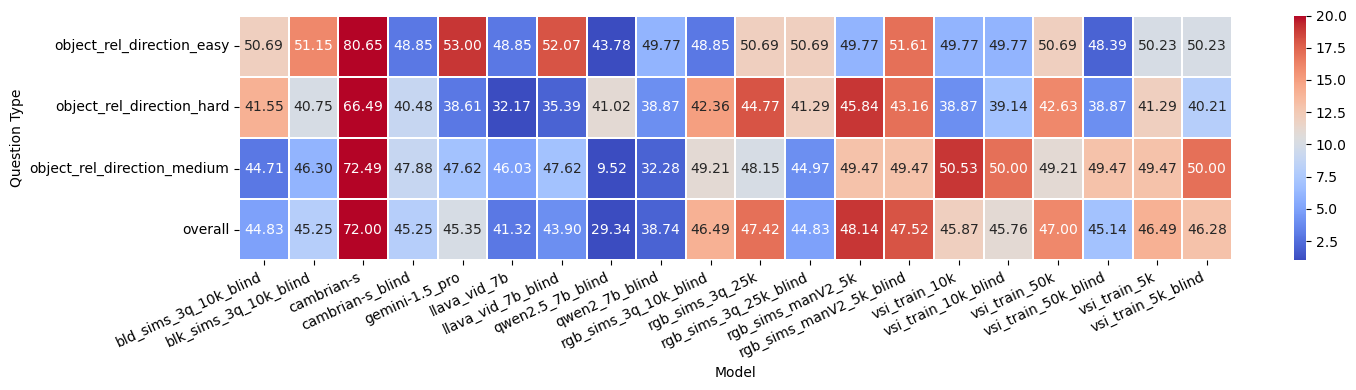

In [7]:
dv.visualize_model_scores(qdf);

In [8]:
i=0
sudbf = qdf[qdf["question_type"] == "object_rel_direction_easy"]
sudbf["question"].iloc[i]

'If I am standing by the stove and facing the sofa, is the tv to the left or the right of the sofa?'

In [9]:
"-".join([str(i) for i in [1,2,3]])

'1-2-3'

In [10]:
import re

OBJ_REL_DIRECTION_HARD_TEMPLATE = \
OBJ_REL_DIRECTION_V1_TEMPLATE = """
If I am standing by the {positioning_object} and facing the {orienting_object}, is the {querying_object} to my front-left, front-right, back-left, or back-right?
The directions refer to the quadrants of a Cartesian plane (if I am standing at the origin and facing along the positive y-axis).
""".strip()

OBJ_REL_DIRECTION_MEDIUM_TEMPLATE = \
OBJ_REL_DIRECTION_V2_TEMPLATE = """
If I am standing by the {positioning_object} and facing the {orienting_object}, is the {querying_object} to my left, right, or back?
An object is to my back if I would have to turn at least 135 degrees in order to face it.
""".strip()

OBJ_REL_DIRECTION_EASY_TEMPLATE = \
OBJ_REL_DIRECTION_V3_TEMPLATE = """
If I am standing by the {positioning_object} and facing the {orienting_object}, is the {querying_object} to the left or the right of the {orienting_object}?
""".strip()


qdf["gt_idx"] = qdf["ground_truth"].apply(lambda x: "ABCD".index(x))
qdf["gt_option"] = qdf.apply(lambda row: row["options"][row["gt_idx"]].split(". ")[-1], axis=1)
# NOTE: the below works for all 3: easy, medium, and hard questions
qdf[["positioning_object", "orienting_object", "querying_object"]] = qdf["question"].str.extract(r'standing by the (.*?) and facing the (.*?), is the (.*?) to')

# qdf[["object_1", "object_2", "object_3", "object_4", "target_object"]] = qdf["question"].str.extract(r'which of these objects \((.*?), (.*?), (.*?), (.*?)\) is the closest to the (.*?)\?$')
# qdf["tgt_opt_pair"] = qdf.apply(lambda row: "-".join(sorted([row["target_object"], row["gt_option"]])), axis=1)
# qdf["tgt_gt_pair"] = qdf.apply(lambda row: "-".join(sorted([row["target_object"], row["gt_object"]])), axis=1)
# qdf["tgt_gt_ord_pair"] = qdf.apply(lambda row: row["target_object"] + "-" + row["gt_object"], axis=1)

# make a combined position+orient+query object column
qdf["poq"] = qdf.apply(lambda row: ",".join(sorted([row["positioning_object"], row["orienting_object"], row["querying_object"]])), axis=1)
qdf["ordered_poq"] = qdf.apply(lambda row: ",".join([row["positioning_object"], row["querying_object"], row["orienting_object"]]), axis=1)
qdf["poq_gt"] = qdf.apply(lambda row: row["poq"] + "," + row["gt_option"], axis=1)
qdf["poq_gt_ord"] = qdf.apply(lambda row: row["ordered_poq"] + "," + row["gt_option"], axis=1)

# --> it seems that the objects are always in the same order as the options

qdf.iloc[0]

id                                                                       957
dataset                                                          arkitscenes
scene_name                                                          41069025
question_type                                      object_rel_direction_hard
question                   If I am standing by the stove and facing the s...
ground_truth                                                               A
options                    [A. front-left, B. back-right, C. back-left, D...
bld_sims_3q_10k_blind                                                    1.0
blk_sims_3q_10k_blind                                                    1.0
cambrian-s                                                               1.0
cambrian-s_blind                                                         1.0
gemini-1.5_pro                                                           1.0
llava_vid_7b                                                             0.0

In [11]:
# look at the value counts of the ground_truth labels
qdf["gt_option"].value_counts()

gt_option
left           299
right          278
front-left     160
front-right    152
back-right      32
back-left       29
back            18
Name: count, dtype: int64

In [12]:
qdf.groupby("question_type")["gt_option"].value_counts()

question_type                gt_option  
object_rel_direction_easy    left           111
                             right          106
object_rel_direction_hard    front-left     160
                             front-right    152
                             back-right      32
                             back-left       29
object_rel_direction_medium  left           188
                             right          172
                             back            18
Name: count, dtype: int64

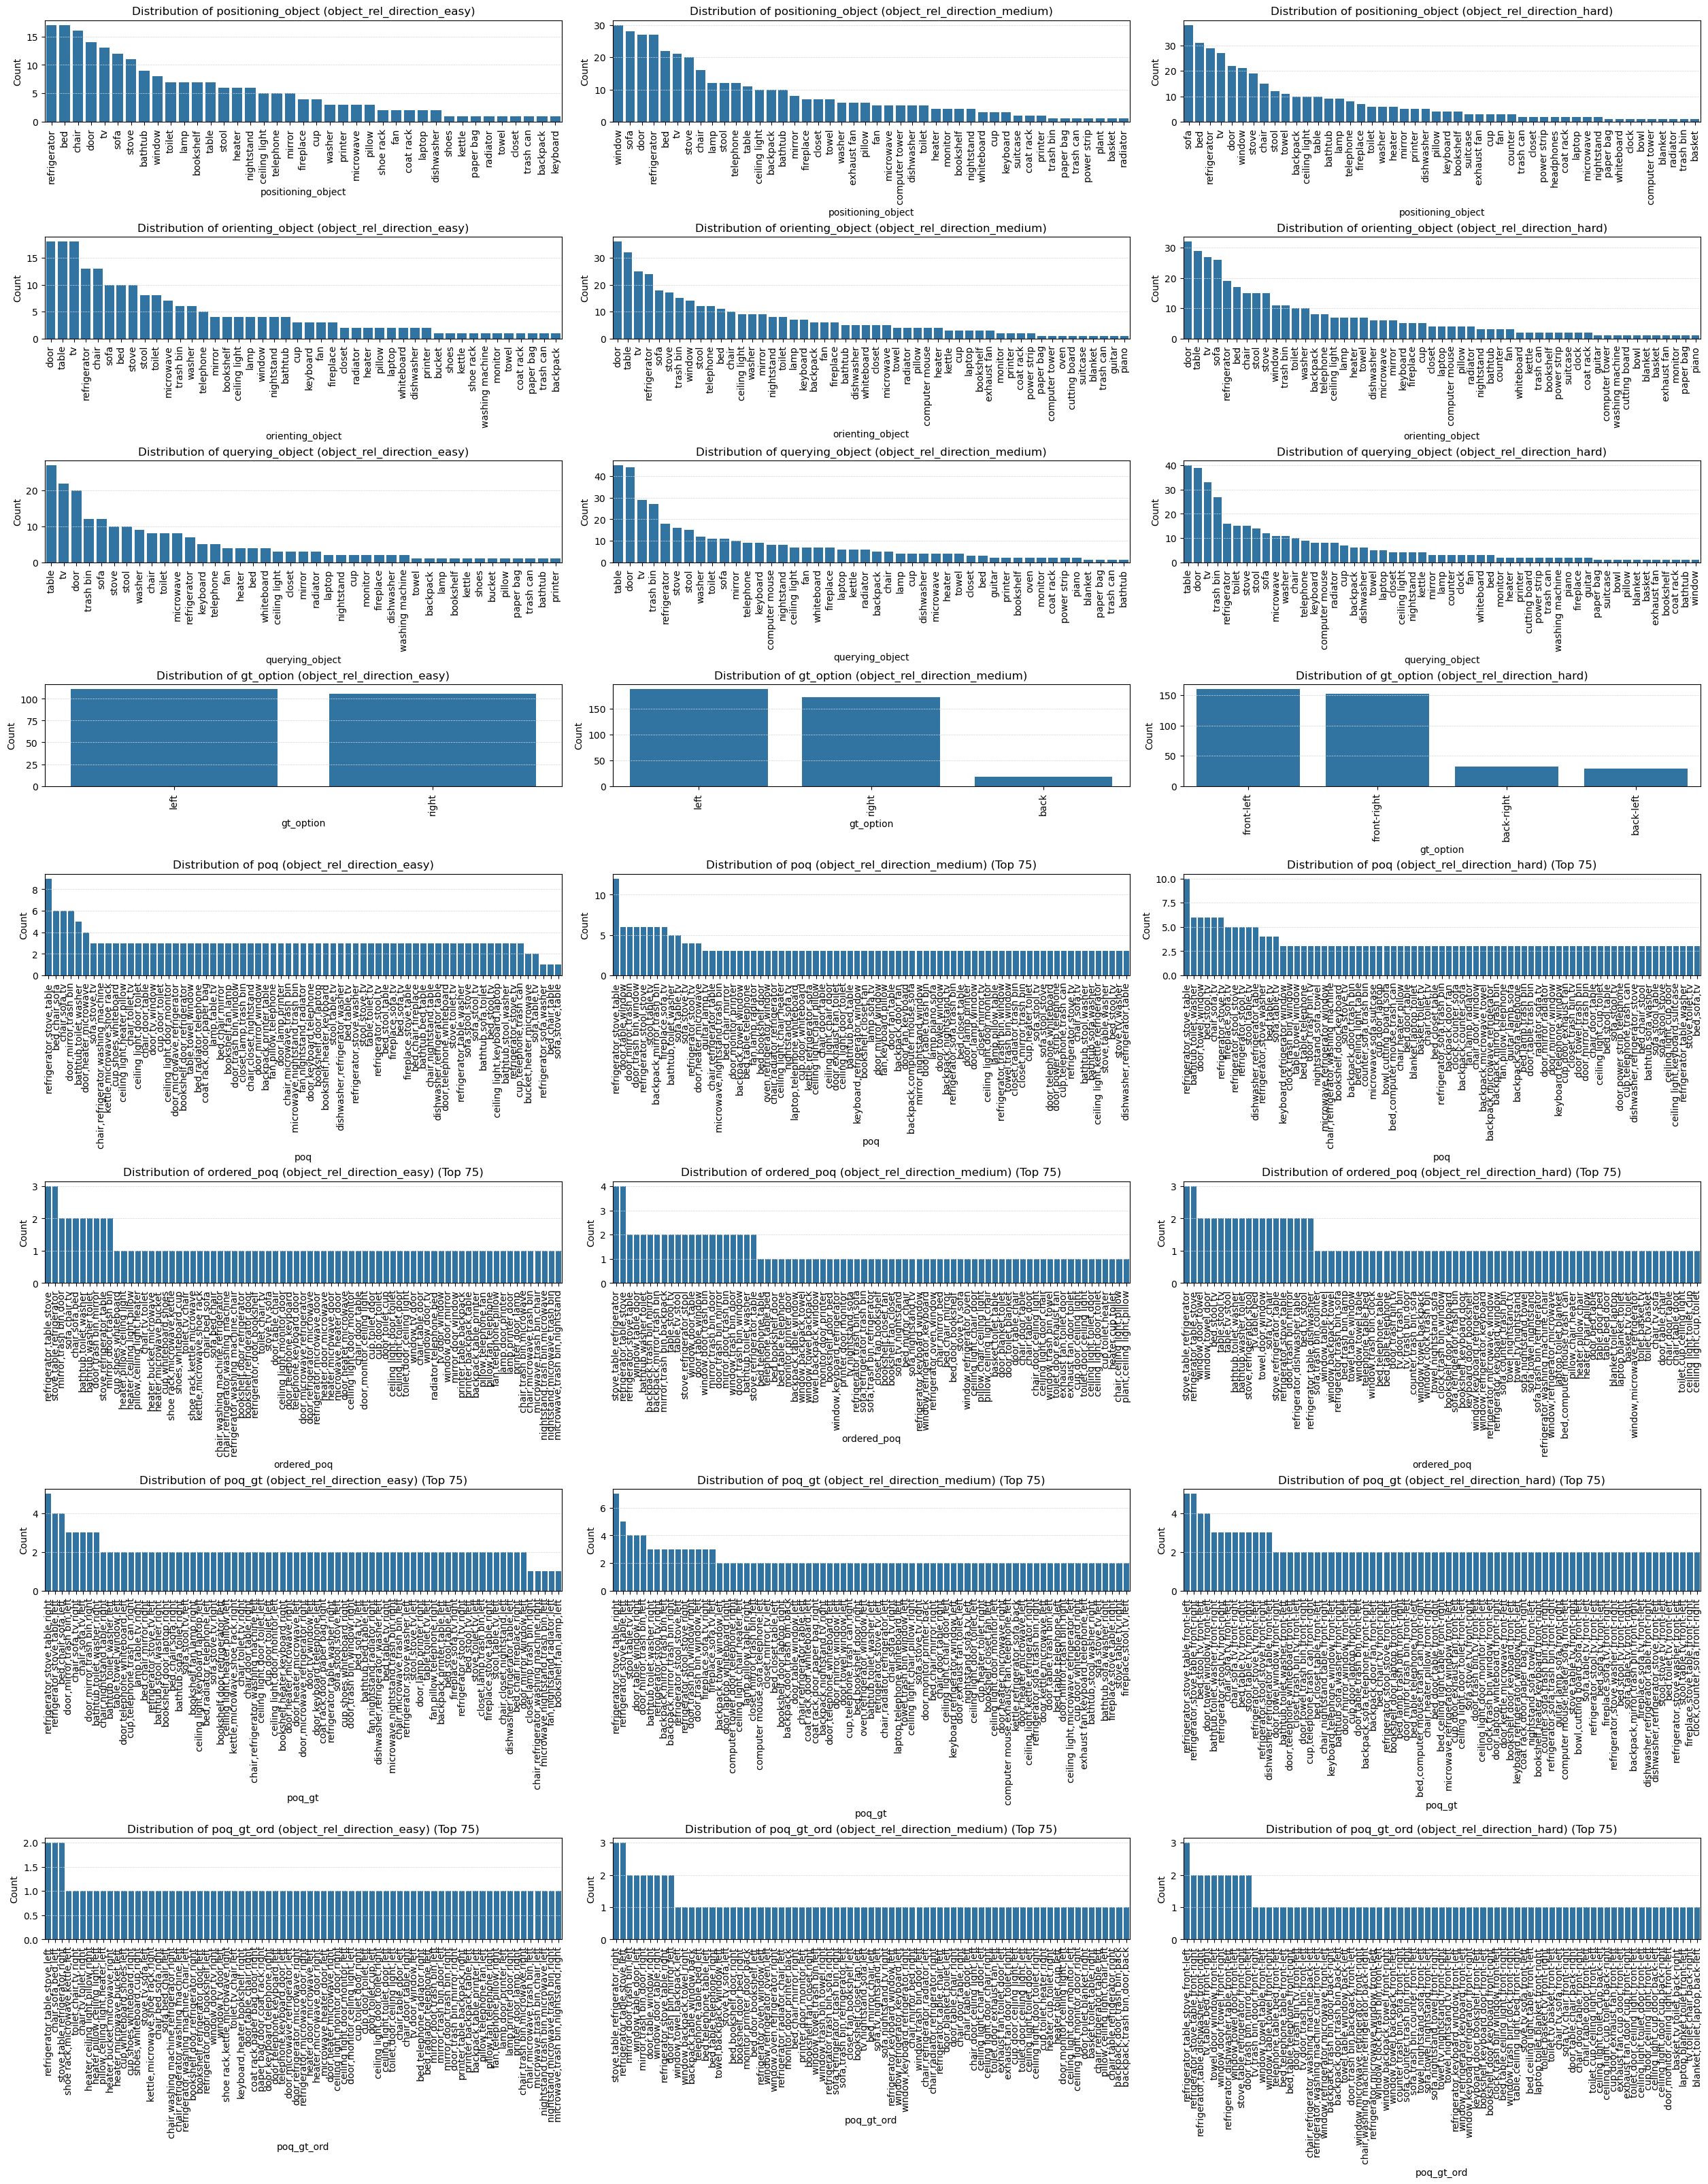

In [13]:
# cols = [
#     "positioning_object", "orienting_object", "querying_object", "gt_option", "poq", "ordered_poq", "poq_gt", "poq_gt_ord",
# ]

# fig, axes = plt.subplots(len(cols), 1, figsize=(25, 4 * len(cols)), constrained_layout=True)

# max_k = 75
# for i, col in enumerate(cols):
#     top_values = qdf[col].value_counts().head(max_k).index
#     sns.countplot(data=qdf[qdf[col].isin(top_values)], x=col, order=top_values, ax=axes[i])
#     title = f"Distribution of {col}"
#     if len(top_values) == max_k:
#         title += f" (Top {max_k})"
#     axes[i].grid(visible=True, which='major', axis='y', color='lightgray', linestyle='--', linewidth=0.5)
#     axes[i].set_title(title)
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel("Count")
#     axes[i].tick_params(axis='x', rotation=90)

# plt.show()


cols = [
    "positioning_object", "orienting_object", "querying_object", "gt_option", "poq", "ordered_poq", "poq_gt", "poq_gt_ord",
]

question_types = ["object_rel_direction_easy", "object_rel_direction_medium", "object_rel_direction_hard"]

fig, axes = plt.subplots(len(cols), len(question_types), figsize=(25, 4 * len(cols)), constrained_layout=True)

max_k = 75
for i, col in enumerate(cols):
    for j, q_type in enumerate(question_types):
        filtered_qdf = qdf[qdf["question_type"] == q_type]
        top_values = filtered_qdf[col].value_counts().head(max_k).index
        sns.countplot(data=filtered_qdf[filtered_qdf[col].isin(top_values)], x=col, order=top_values, ax=axes[i, j])
        title = f"Distribution of {col} ({q_type})"
        if len(top_values) == max_k:
            title += f" (Top {max_k})"
        axes[i, j].grid(visible=True, which='major', axis='y', color='lightgray', linestyle='--', linewidth=0.5)
        axes[i, j].set_title(title)
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel("Count")
        axes[i, j].tick_params(axis='x', rotation=90)

plt.show()

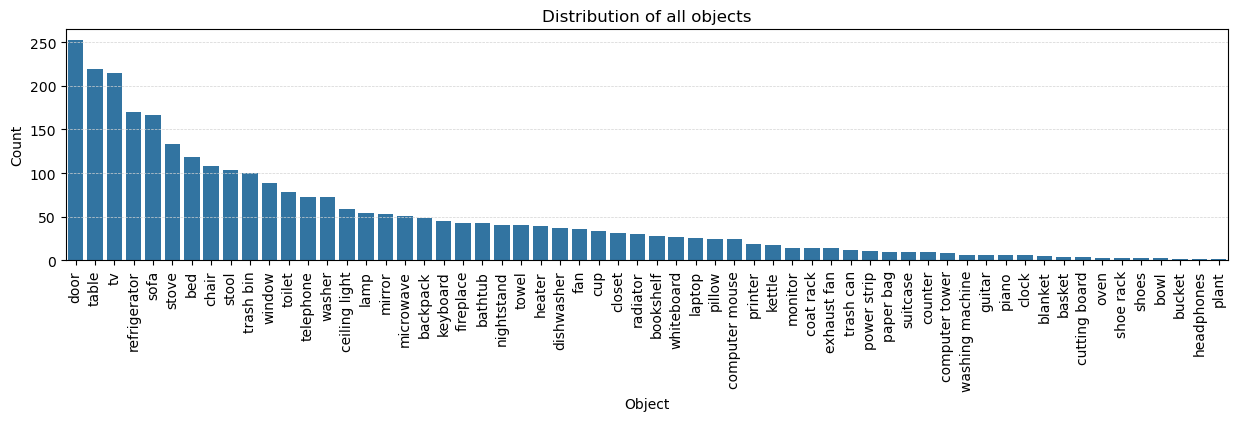

In [14]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.grid(visible=True, which='both', color='lightgray', linestyle='--', linewidth=0.5)
# finally, also plot the distribution of distinct objects in either slot (object_1 or object_2)
all_objects = (
    qdf["positioning_object"].tolist() +
    qdf["orienting_object"].tolist() +
    qdf["querying_object"].tolist()
)
all_objects = pd.Series(all_objects).value_counts().reset_index()
# just plot the object and values normally
sns.barplot(data=all_objects, x="index", y="count", ax=ax)
ax.set_title("Distribution of all objects")
ax.set_xlabel("Object")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=90)
plt.show()

In [15]:
qdf.iloc[0]

id                                                                       957
dataset                                                          arkitscenes
scene_name                                                          41069025
question_type                                      object_rel_direction_hard
question                   If I am standing by the stove and facing the s...
ground_truth                                                               A
options                    [A. front-left, B. back-right, C. back-left, D...
bld_sims_3q_10k_blind                                                    1.0
blk_sims_3q_10k_blind                                                    1.0
cambrian-s                                                               1.0
cambrian-s_blind                                                         1.0
gemini-1.5_pro                                                           1.0
llava_vid_7b                                                             0.0

In [16]:
qdf["ground_truth"].value_counts()

ground_truth
B    329
A    327
C    219
D     93
Name: count, dtype: int64

In [17]:
len(qdf)

968

In [18]:
pd.set_option('display.max_rows', 100)
budget = 400

Removed 586 samples from the dataset. Now 382 samples remain.


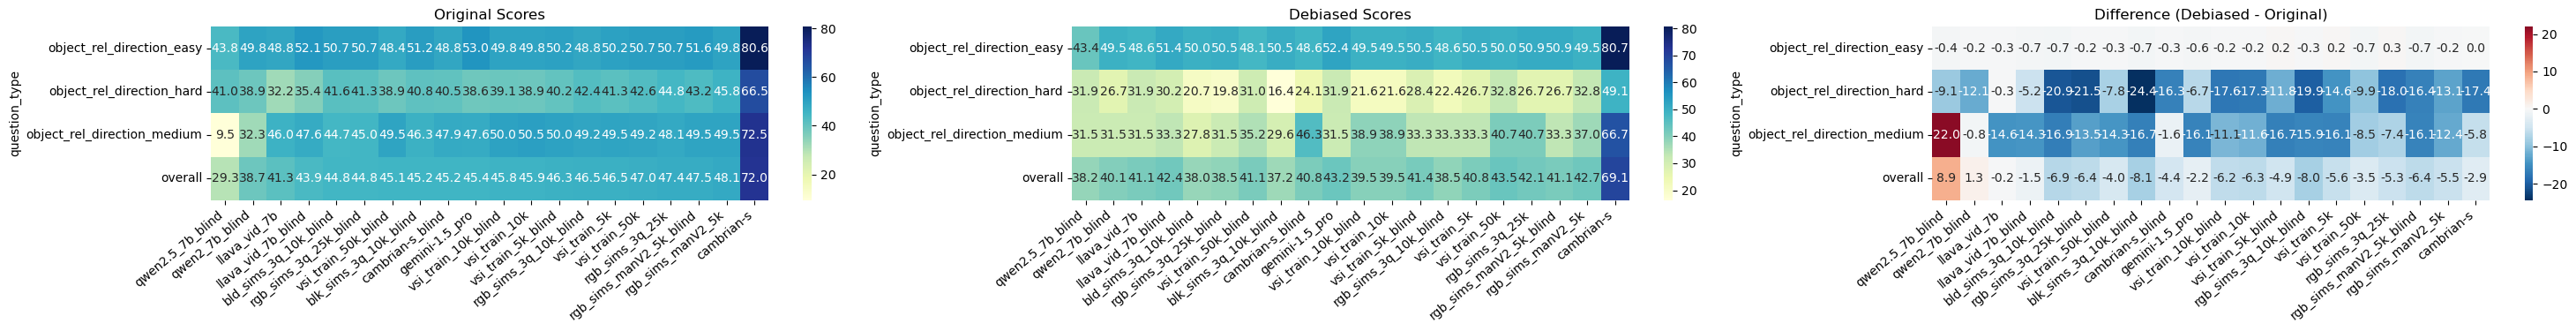

In [19]:
ids = dv.filter_object_rel_direction_v2(qdf, budget=586, seed=42)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

In [20]:
# removed_qdf

Total samples identified for full balancing: 586
Actual number of samples selected for removal (prioritizing high bias score): 586
Removed 586 samples from the dataset. Now 382 samples remain.


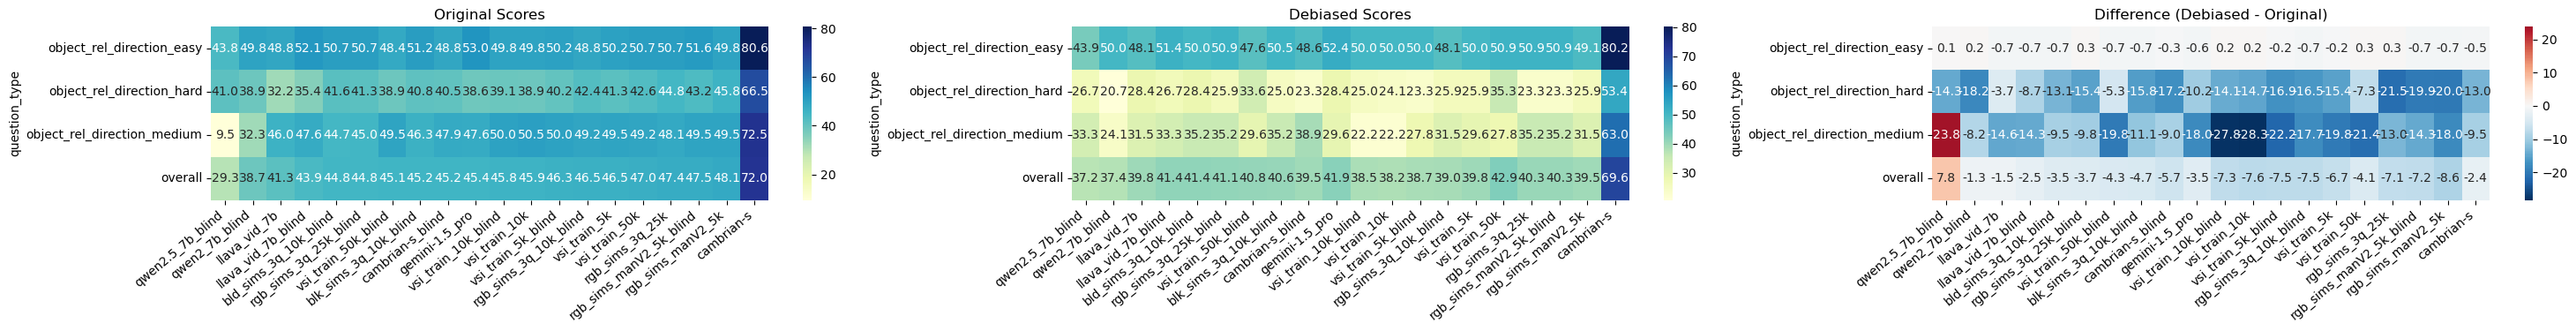

In [21]:
ids = dv.filter_object_rel_direction_scored(qdf, budget=586, seed=42)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

HMMM. seems like the scored approach is overkill.

Total samples identified for full balancing: 586
Actual number of samples selected for removal to balance: 586
Removed 580 samples from the dataset. Now 388 samples remain.


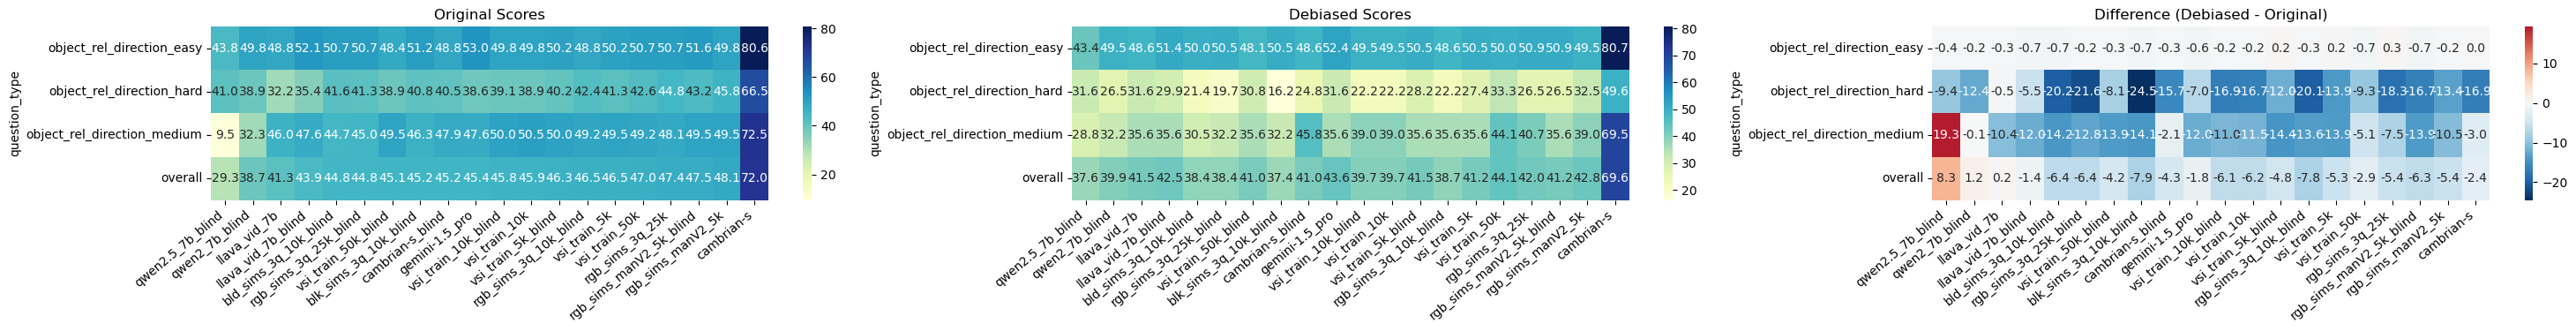

In [22]:
ids = dv.filter_object_rel_direction_v2(qdf, budget=580, seed=42, shuffled=True, verbose=True)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Total samples identified for full balancing: 586
Actual number of samples selected for removal to balance: 586
Removed 586 samples from the dataset. Now 382 samples remain.


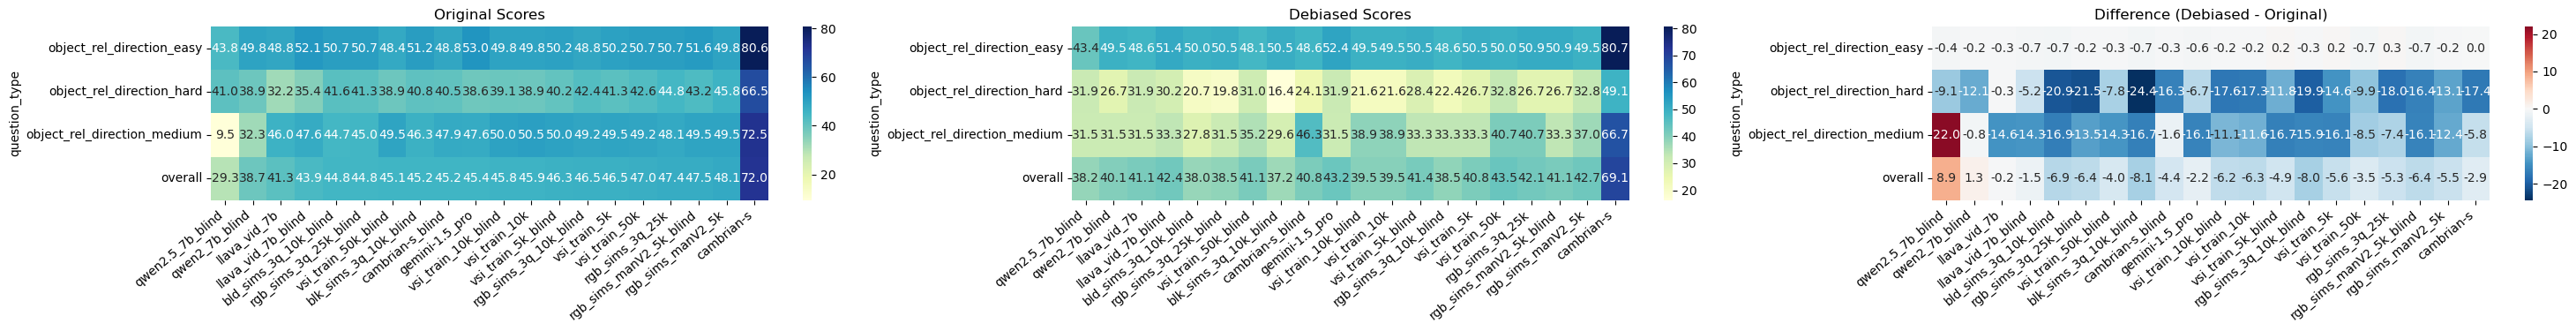

In [23]:
ids = dv.filter_object_rel_direction_v2(qdf, budget=586, seed=42, shuffled=True, verbose=True)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

In [24]:
deb_qdf["question_type"].value_counts()

question_type
object_rel_direction_easy      212
object_rel_direction_hard      116
object_rel_direction_medium     54
Name: count, dtype: int64

In [25]:
deb_qdf.groupby("question_type")["gt_option"].value_counts()

question_type                gt_option  
object_rel_direction_easy    left           106
                             right          106
object_rel_direction_hard    back-left       29
                             back-right      29
                             front-left      29
                             front-right     29
object_rel_direction_medium  back            18
                             left            18
                             right           18
Name: count, dtype: int64

In [26]:
qdf.groupby("question_type")["gt_option"].value_counts()

question_type                gt_option  
object_rel_direction_easy    left           111
                             right          106
object_rel_direction_hard    front-left     160
                             front-right    152
                             back-right      32
                             back-left       29
object_rel_direction_medium  left           188
                             right          172
                             back            18
Name: count, dtype: int64

In [27]:
removed_qdf.head()

id      dataset scene_name              question_type  \
956  957  arkitscenes   41069025  object_rel_direction_hard   
957  958  arkitscenes   41069025  object_rel_direction_hard   
958  959  arkitscenes   41069025  object_rel_direction_hard   
959  960  arkitscenes   41159504  object_rel_direction_hard   
960  961  arkitscenes   41159504  object_rel_direction_hard   

                                              question ground_truth  \
956  If I am standing by the stove and facing the s...            A   
957  If I am standing by the stove and facing the t...            B   
958  If I am standing by the sofa and facing the st...            C   
959  If I am standing by the bathtub and facing the...            D   
960  If I am standing by the bathtub and facing the...            B   

                                               options  bld_sims_3q_10k_blind  \
956  [A. front-left, B. back-right, C. back-left, D...                    1.0   
957  [A. back-left, B. front-right, C. back-right, ...                    1.0   
958  [A. back-left, B. front-left, C. front-right, ...                    1.0   
959  [A. back-left, B. back-right, C. front-right, ...                    0.0   
960  [A. back-left, B. front-right, C. front-left, ...                    1.0   

     blk_sims_3q_10k_blind  cambrian-s  ...  vsi_train_5k_blind  gt_idx  \
956                    1.0         1.0  ...                 0.0       0   
957                    1.0         1.0  ...                 0.0       1   
958                    1.0         1.0  ...                 1.0       2   
959                    0.0         1.0  ...                 1.0       3   
960                    1.0         1.0  ...                 0.0       1   

       gt_option  positioning_object  orienting_object  querying_object  \
956   front-left               stove              sofa               tv   
957  front-right               stove                tv             sofa   
958  front-right                sofa             stove               tv   
959   front-left             bathtub             table           toilet   
960  front-right             bathtub            toilet            table   

                      poq           ordered_poq  \
956         sofa,stove,tv         stove,tv,sofa   
957         sofa,stove,tv         stove,sofa,tv   
958         sofa,stove,tv         sofa,tv,stove   
959  bathtub,table,toilet  bathtub,toilet,table   
960  bathtub,table,toilet  bathtub,table,toilet   

                               poq_gt                        poq_gt_ord  
956          sofa,stove,tv,front-left          stove,tv,sofa,front-left  
957         sofa,stove,tv,front-right         stove,sofa,tv,front-right  
958         sofa,stove,tv,front-right         sofa,tv,stove,front-right  
959   bathtub,table,toilet,front-left   bathtub,toilet,table,front-left  
960  bathtub,table,toilet,front-right  bathtub,table,toilet,front-right  

[5 rows x 36 columns]

In [28]:
a = dv.evaluate_models(qdf.loc[qdf["id"].isin(ids)])
b = dv.evaluate_models(qdf.loc[~qdf["id"].isin(ids)])
c = dv.evaluate_models(qdf)
d = b - c
# concat the dfs
# pd.concat([a, b], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased"})
# pd.concat([a, b, c], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original"})
pd.concat([a, b, c, d], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original", 3: "Difference"}).T.sort_values("Difference")

Removed   Debiased   Original  Difference          4  \
qwen2.5_7b_blind            60.0  45.136187   5.864198   23.549488  43.396226   
qwen2_7b_blind              60.0  44.357977  32.407407   37.883959  49.528302   
llava_vid_7b                60.0  32.295720  48.456790   41.467577  48.584906   
llava_vid_7b_blind          80.0  37.743191  50.000000   44.880546  51.415094   
gemini-1.5_pro              80.0  41.634241  50.308642   46.757679  52.358491   
vsi_train_50k_blind         60.0  42.412451  51.851852   47.781570  48.113208   
cambrian-s_blind            60.0  47.859922  48.148148   48.122867  48.584906   
rgb_sims_3q_25k_blind       60.0  50.972763  47.222222   48.976109  50.471698   
bld_sims_3q_10k_blind       80.0  50.972763  47.530864   49.317406  50.000000   
vsi_train_50k               80.0  47.081712  50.617284   49.317406  50.000000   
vsi_train_5k_blind          40.0  45.525292  52.777778   49.488055  50.471698   
vsi_train_10k_blind         60.0  47.081712  51.851852   49.829352  49.528302   
vsi_train_10k               60.0  46.692607  52.469136   50.000000  49.528302   
vsi_train_5k                40.0  47.859922  52.160494   50.170648  50.471698   
blk_sims_3q_10k_blind       80.0  51.750973  49.074074   50.511945  50.471698   
rgb_sims_3q_25k             40.0  52.918288  49.382716   50.853242  50.943396   
rgb_sims_manV2_5k           60.0  51.750973  51.543210   51.706485  49.528302   
rgb_sims_manV2_5k_blind     80.0  50.583658  52.160494   51.706485  50.943396   
rgb_sims_3q_10k_blind       60.0  51.361868  51.851852   51.706485  48.584906   
cambrian-s                  80.0  74.319066  73.456790   73.890785  80.660377   

                                 5          6          7          8  \
qwen2.5_7b_blind         31.896552  31.481481  38.219895  43.778802   
qwen2_7b_blind           26.724138  31.481481  40.052356  49.769585   
llava_vid_7b             31.896552  31.481481  41.099476  48.847926   
llava_vid_7b_blind       30.172414  33.333333  42.408377  52.073733   
gemini-1.5_pro           31.896552  31.481481  43.193717  52.995392   
vsi_train_50k_blind      31.034483  35.185185  41.099476  48.387097   
cambrian-s_blind         24.137931  46.296296  40.837696  48.847926   
rgb_sims_3q_25k_blind    19.827586  31.481481  38.481675  50.691244   
bld_sims_3q_10k_blind    20.689655  27.777778  37.958115  50.691244   
vsi_train_50k            32.758621  40.740741  43.455497  50.691244   
vsi_train_5k_blind       28.448276  33.333333  41.361257  50.230415   
vsi_train_10k_blind      21.551724  38.888889  39.528796  49.769585   
vsi_train_10k            21.551724  38.888889  39.528796  49.769585   
vsi_train_5k             26.724138  33.333333  40.837696  50.230415   
blk_sims_3q_10k_blind    16.379310  29.629630  37.172775  51.152074   
rgb_sims_3q_25k          26.724138  40.740741  42.146597  50.691244   
rgb_sims_manV2_5k        32.758621  37.037037  42.670157  49.769585   
rgb_sims_manV2_5k_blind  26.724138  33.333333  41.099476  51.612903   
rgb_sims_3q_10k_blind    22.413793  33.333333  38.481675  48.847926   
cambrian-s               49.137931  66.666667  69.109948  80.645161   

                                 9         10         11        12         13  \
qwen2.5_7b_blind         41.018767   9.523810  29.338843 -0.382575  -9.122215   
qwen2_7b_blind           38.873995  32.275132  38.739669 -0.241283 -12.149857   
llava_vid_7b             32.171582  46.031746  41.322314 -0.263021  -0.275030   
llava_vid_7b_blind       35.388740  47.619048  43.904959 -0.658638  -5.216326   
gemini-1.5_pro           38.605898  47.619048  45.351240 -0.636901  -6.709346   
vsi_train_50k_blind      38.873995  49.470899  45.144628 -0.273889  -7.839512   
cambrian-s_blind         40.482574  47.883598  45.247934 -0.263021 -16.344643   
rgb_sims_3q_25k_blind    41.286863  44.973545  44.834711 -0.219546 -21.459277   
bld_sims_3q_10k_blind    41.554960  44.708995  44.834711 -0.691244 -20.865305   
vsi_train_50k        